# Image Classification on CIFAR-10 dataset

###The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

###There are 50000 training images and 10000 test images.



In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## Data Loading


In [1]:
from keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


## Data Visualization

[4]


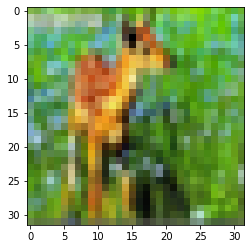

In [124]:
i = 1005
plt.imshow(xtrain[i])
print(ytrain[i])

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


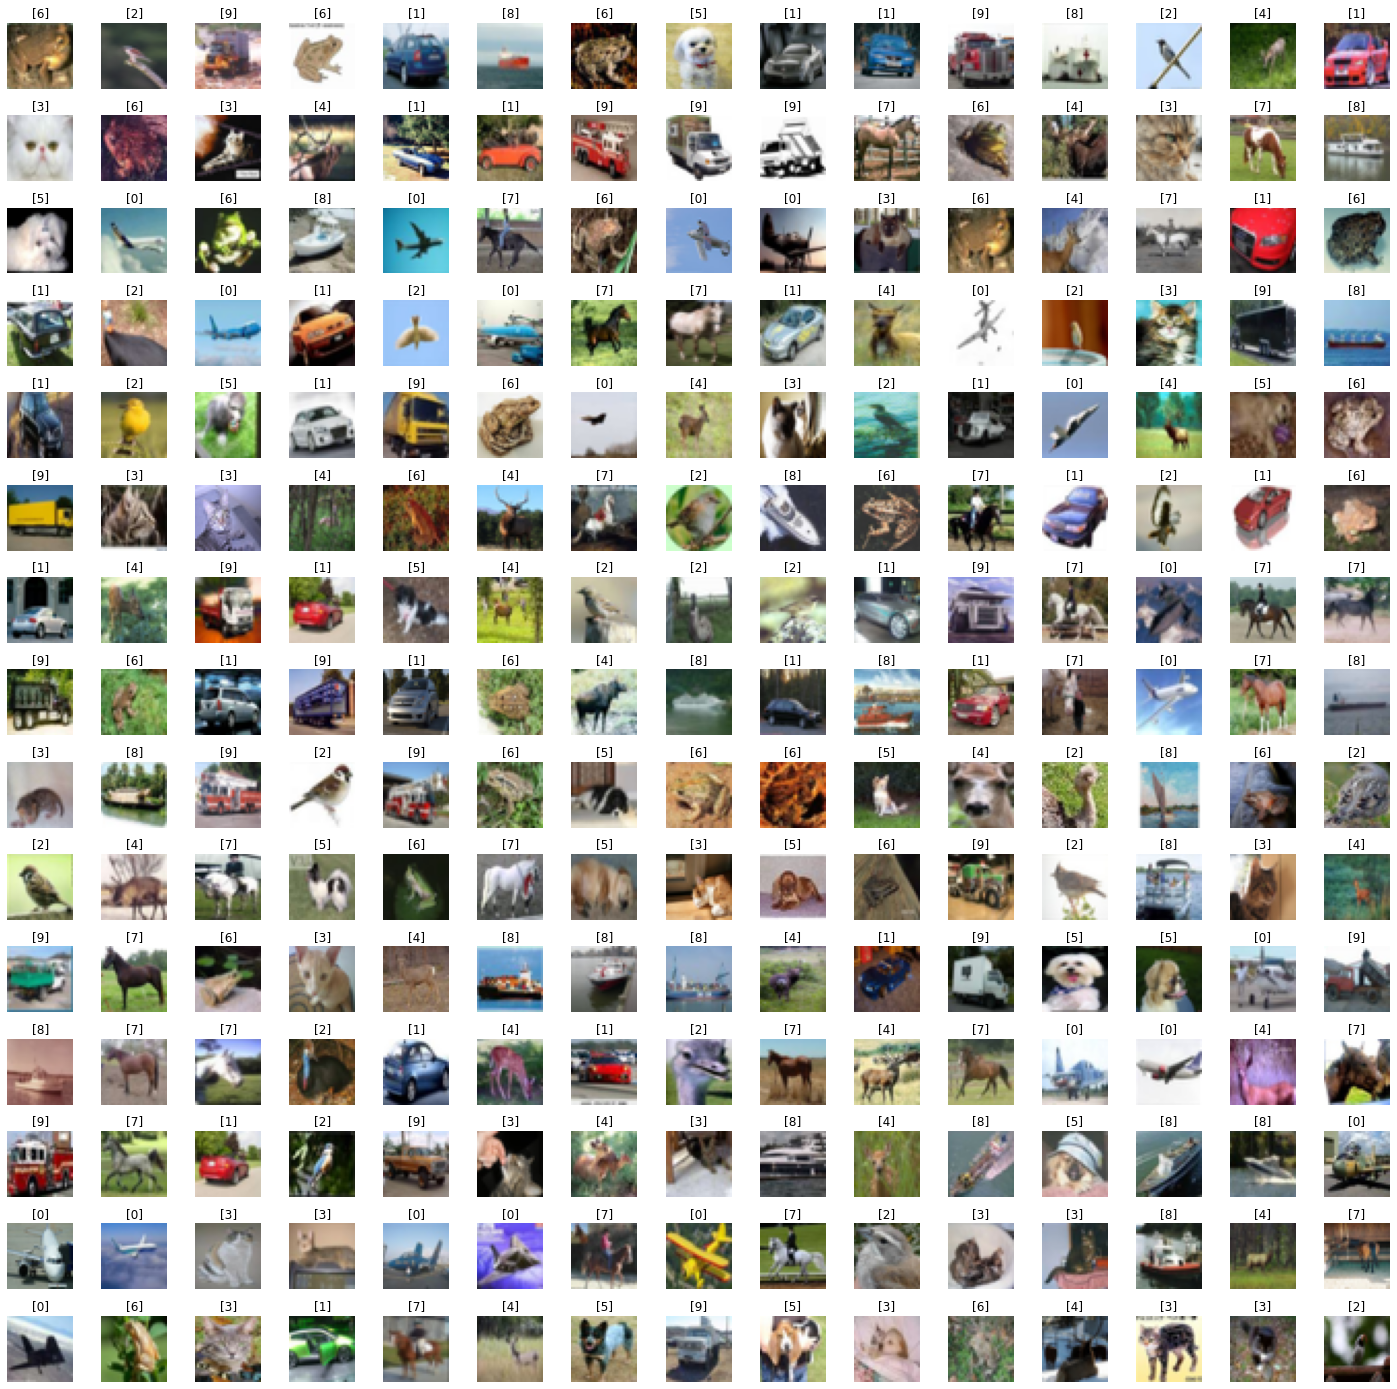

In [125]:
#Plotting images to visualize
w_grid = 15
l_grid = 15
fig,axes = plt.subplots(l_grid,w_grid,figsize = (25,25))
axes = axes.ravel();

for i in np.arange(0,l_grid*w_grid):
    index = np.random.randint(0,50000)
    axes[i].imshow(xtrain[index])
    axes[i].set_title(ytrain[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Data Preprocessing

In [2]:
#Converting data to 32 bit floats
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [5]:
#Normalize
xtrain = xtrain/255
xtest = xtest/255


In [20]:
ytrain = keras.utils.to_categorical(ytrain,10)
ytest = keras.utils.to_categorical(ytest,10)

In [21]:
Input_shape = (32,32,3)

## Model Training

In [22]:
# Import
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


## Model 1


In [23]:
# Creating the model
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu',padding="same",input_shape=Input_shape))
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',padding="same"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu',padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(units =400,activation='relu'))
model.add(Dense(units = 200,activation='relu'))

model.add(Dense(units = 10,activation='softmax'))

In [24]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [25]:
hist = model.fit(xtrain,ytrain,batch_size= 32 ,epochs = 50,verbose=1,shuffle = True,validation_data=(xtest,ytest))

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3669 - accuracy: 0.5030 - val_loss: 1.0953 - val_accuracy: 0.6113
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9315 - accuracy: 0.6716 - val_loss: 0.8853 - val_accuracy: 0.6892
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7401 - accuracy: 0.7407 - val_loss: 0.8332 - val_accuracy: 0.7134
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5799 - accuracy: 0.7945 - val_loss: 0.8427 - val_accuracy: 0.7183
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4338 - accuracy: 0.8472 - val_loss: 0.8843 - val_accuracy: 0.7262
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3064 - accuracy: 0.8926 - val_loss: 1.0626 - val_accuracy: 0.7210
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2204 - accuracy: 0.9229 - val_loss: 1.1968 - val_accuracy:

In [26]:
best=max(hist.history['val_accuracy']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 72.62


In [27]:
score = model.evaluate(xtest,ytest)
model.save('model.h5')

313/313 [==============================] - 1s 3ms/step - loss: 2.9895 - accuracy: 0.7001


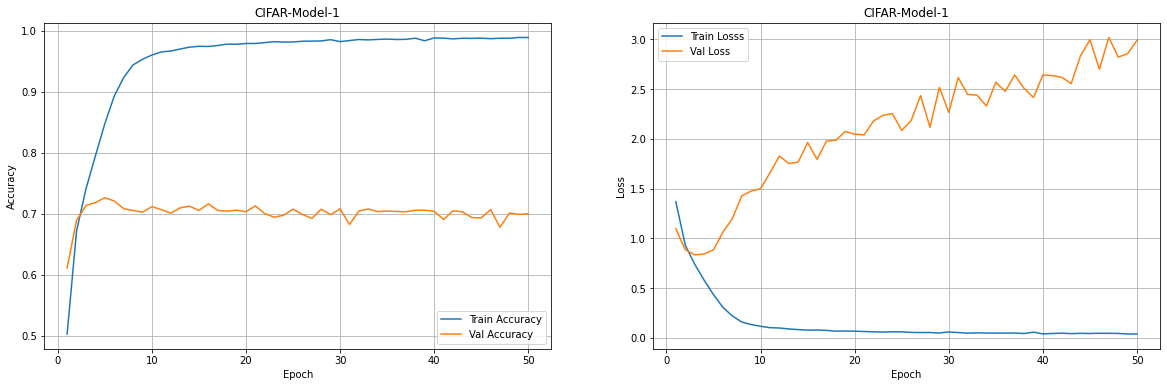

In [28]:
#Plotting the data
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,hist.history['accuracy'],label='Train Accuracy')
plt.plot(epochs,hist.history['val_accuracy'],label='Val Accuracy')
plt.title('CIFAR-Model-1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.grid()
plt.legend()
plt.savefig('C_Accuracy_model_1.png')

plt.subplot(1,2,2)
plt.plot(epochs,hist.history['loss'],label='Train Losss')
plt.plot(epochs,hist.history['val_loss'],label='Val Loss')
plt.title('CIFAR-Model-1')


plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('C_Loss_model_1.png')
plt.show()

## Model 2

In [29]:
# Adding more conv layers
model1 = Sequential()
model1.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu',padding="same",input_shape=Input_shape))
model1.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',padding="same"))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',padding="same"))
model1.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu',padding="same"))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu',padding="same"))
model1.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu',padding="same"))
model1.add(MaxPooling2D(2,2))



model1.add(Flatten())

model1.add(Dense(units =400,activation='relu'))
model1.add(Dense(units = 200,activation='relu'))

model1.add(Dense(units = 10,activation='softmax'))

In [30]:
model1.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [31]:
hist1 = model1.fit(xtrain,ytrain,batch_size= 32 ,epochs = 50,verbose=1,shuffle = True,validation_data=(xtest,ytest))

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5675 - acc: 0.4225 - val_loss: 1.2877 - val_acc: 0.5444
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0915 - acc: 0.6100 - val_loss: 0.9728 - val_acc: 0.6586
Epoch 3/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8580 - acc: 0.6967 - val_loss: 0.8887 - val_acc: 0.6867
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7054 - acc: 0.7516 - val_loss: 0.8270 - val_acc: 0.7191
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5846 - acc: 0.7948 - val_loss: 0.8053 - val_acc: 0.7262
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4801 - acc: 0.8312 - val_loss: 0.8468 - val_acc: 0.7343
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3978 - acc: 0.8595 - val_loss: 0.8870 - val_acc: 0.7176
Epoch 8/50
1563/1563 [==============================] -

In [32]:
best=max(hist1.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 74.6


In [33]:
score = model1.evaluate(xtest,ytest)
model1.save('model1.h5')

313/313 [==============================] - 1s 4ms/step - loss: 1.8220 - acc: 0.7422


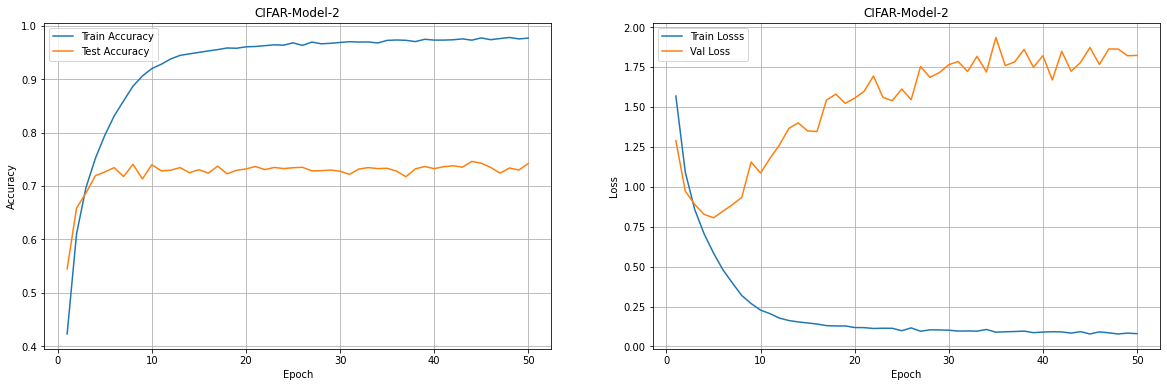

In [34]:
#Plotting data 
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,hist1.history['acc'],label='Train Accuracy')
plt.plot(epochs,hist1.history['val_acc'],label='Test Accuracy')
plt.title('CIFAR-Model-2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('C_Accuracy_model_2.png')

plt.subplot(1,2,2)
plt.plot(epochs,hist1.history['loss'],label='Train Losss')
plt.plot(epochs,hist1.history['val_loss'],label='Val Loss')
plt.title('CIFAR-Model-2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('C_Loss_model_2.png')
plt.show()

## Model 3 using Dropout


In [35]:
# Adding Dropout 
model2 = Sequential()
model2.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu',padding="same",input_shape=Input_shape))
model2.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',padding="same"))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))

model2.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',padding="same"))
model2.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu',padding="same"))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))

model2.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu',padding="same"))
model2.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu',padding="same"))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))


model2.add(Flatten())
model2.add(Dense(units =400,activation='relu'))
model2.add(Dense(units = 200,activation='relu'))
model2.add(Dense(units = 10,activation='softmax'))

In [36]:
model2.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

In [37]:
hist2 = model2.fit(xtrain,ytrain,batch_size= 32 ,epochs = 50,verbose=1,shuffle = True,validation_data=(xtest,ytest))

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6536 - acc: 0.3857 - val_loss: 1.2981 - val_acc: 0.5332
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2210 - acc: 0.5563 - val_loss: 1.0581 - val_acc: 0.6134
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0639 - acc: 0.6180 - val_loss: 1.0167 - val_acc: 0.6316
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9567 - acc: 0.6591 - val_loss: 0.9498 - val_acc: 0.6711
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8787 - acc: 0.6904 - val_loss: 0.8461 - val_acc: 0.7042
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8221 - acc: 0.7091 - val_loss: 0.8429 - val_acc: 0.7062
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7711 - acc: 0.7274 - val_loss: 0.7847 - val_acc: 0.7290
Epoch 8/50
1563/1563 [==============================] -

In [38]:
best=max(hist2.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 78.85


In [39]:
score = model2.evaluate(xtest,ytest)
model2.save('model2.h5')

313/313 [==============================] - 1s 4ms/step - loss: 0.8023 - acc: 0.7815


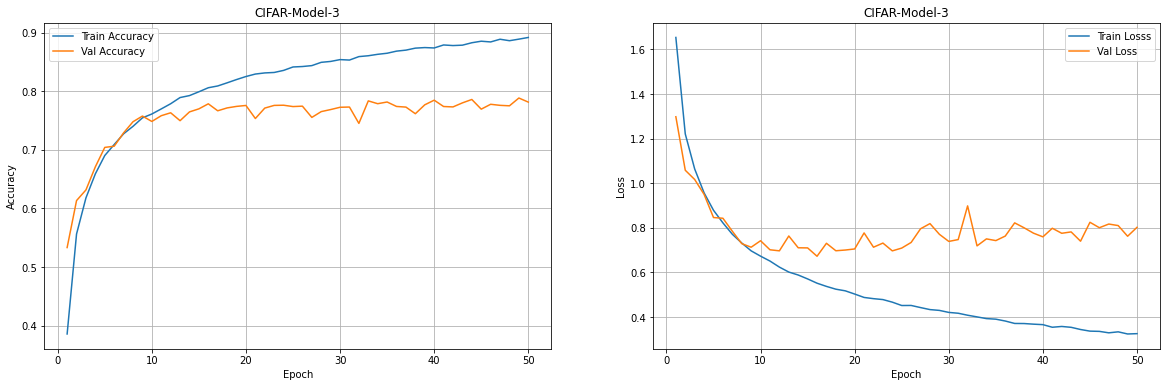

In [40]:
#Plotting Data
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

plt.plot(epochs,hist2.history['acc'],label='Train Accuracy')
plt.plot(epochs,hist2.history['val_acc'],label='Val Accuracy')
plt.title('CIFAR-Model-3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('C_Accuracy_model_3.png')

plt.subplot(1,2,2)
plt.plot(epochs,hist2.history['loss'],label='Train Losss')
plt.plot(epochs,hist2.history['val_loss'],label='Val Loss')
plt.title('CIFAR-Model-3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('C_Loss_model_3.png')
plt.show()

## Model 4 using Batch Normalization

In [41]:
# Adding Batch Normalization
model3 = Sequential()
model3.add(Conv2D(filters = 8, kernel_size = (3,3), activation='relu',padding="same",input_shape=Input_shape))
model3.add(BatchNormalization())
model3.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',padding="same"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',padding="same"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu',padding="same"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu',padding="same"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu',padding="same"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu',padding="same"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters = 1024, kernel_size = (3,3), activation='relu',padding="same"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(units =400,activation='relu'))
model3.add(Dense(units = 200,activation='relu'))

model3.add(Dense(units = 10,activation='softmax'))

In [42]:
model3.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 8)        32        
 hNormalization)                                                 
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                      

In [43]:

hist3 = model3.fit(xtrain,ytrain,batch_size= 32 ,epochs = 50,verbose=1,shuffle = True,validation_data=(xtest,ytest))

Epoch 1/50
1563/1563 [==============================] - 28s 17ms/step - loss: 1.5015 - accuracy: 0.4663 - val_loss: 1.4676 - val_accuracy: 0.5330
Epoch 2/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0410 - accuracy: 0.6339 - val_loss: 0.9363 - val_accuracy: 0.6762
Epoch 3/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8420 - accuracy: 0.7092 - val_loss: 0.7504 - val_accuracy: 0.7469
Epoch 4/50
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7206 - accuracy: 0.7530 - val_loss: 0.8961 - val_accuracy: 0.7077
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6373 - accuracy: 0.7804 - val_loss: 0.7025 - val_accuracy: 0.7679
Epoch 6/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5634 - accuracy: 0.8054 - val_loss: 0.6042 - val_accuracy: 0.8003
Epoch 7/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4985 - accuracy: 0.8259 - val_loss: 0.6667 -

In [44]:
max(hist3.history['val_accuracy'])

0.838699996471405

In [45]:
best=max(hist3.history['val_accuracy']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 83.87


In [46]:
score = model3.evaluate(xtest,ytest)
model3.save('model3.h5')

313/313 [==============================] - 2s 6ms/step - loss: 0.7609 - accuracy: 0.8353


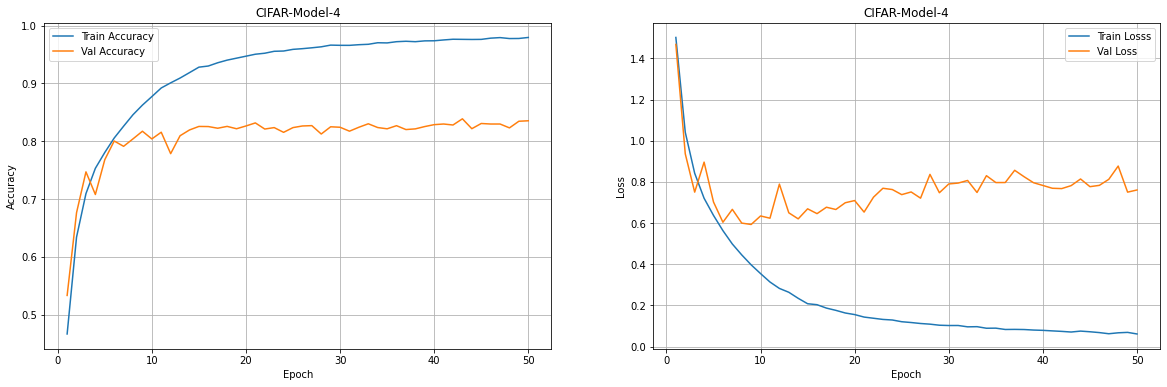

In [47]:
# Plotting Data
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,hist3.history['accuracy'],label='Train Accuracy')
plt.plot(epochs,hist3.history['val_accuracy'],label='Val Accuracy')
plt.title('CIFAR-Model-4')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('C_Accuracy_model_4.png')

plt.subplot(1,2,2)
plt.plot(epochs,hist3.history['loss'],label='Train Losss')
plt.plot(epochs,hist3.history['val_loss'],label='Val Loss')
plt.title('CIFAR-Model-4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('C_Loss_model_4.png')
plt.show()

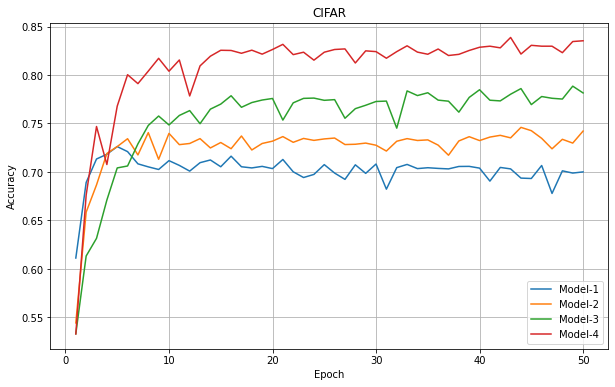

In [48]:
# Comparing 4 models
epochs = range(1,51)
plt.figure(figsize=(10,6))


plt.plot(epochs,hist.history['val_accuracy'],label='Model-1')
plt.plot(epochs,hist1.history['val_acc'],label='Model-2')
plt.plot(epochs,hist2.history['val_acc'],label='Model-3')
plt.plot(epochs,hist3.history['val_accuracy'],label='Model-4')
plt.title('CIFAR')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('Comp.png')

## Prediction


In [49]:
# Using model 3 for predictions
predicted_class =  np.argmax(model3.predict(xtest),axis=1)
predicted_class

313/313 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [50]:
ytest = ytest.argmax(1)
ytest

array([3, 8, 8, ..., 5, 1, 7])

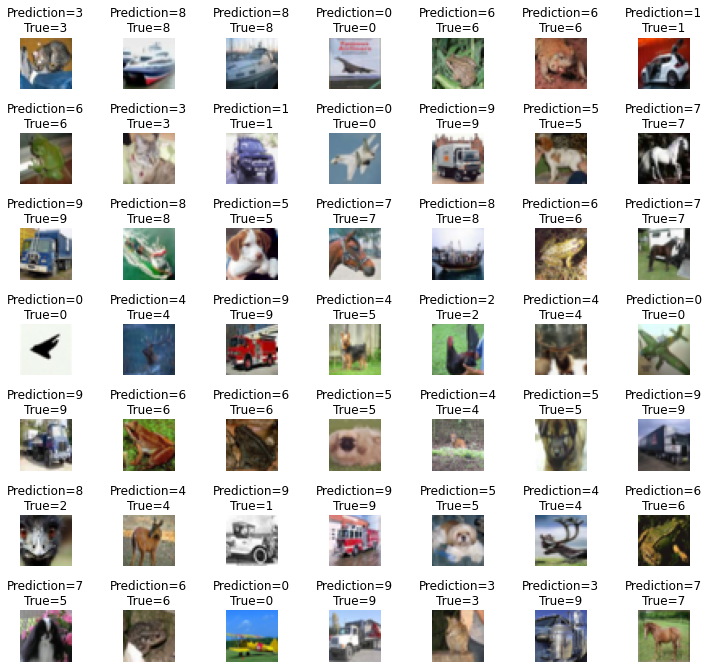

In [51]:
w = 7
l = 7
fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel();

for i in np.arange(0,l*w):
    axes[i].imshow(xtest[i])
    axes[i].set_title("Prediction={}\nTrue={}".format(predicted_class[i],ytest[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ytest,predicted_class)
cm

array([[877,   7,  24,  11,  11,   2,   1,   4,  43,  20],
       [  3, 887,   0,   8,   3,   1,   3,   0,  17,  78],
       [ 49,   0, 730,  68,  66,  37,  23,  12,   6,   9],
       [ 19,   2,  43, 682,  39, 122,  46,  28,   6,  13],
       [  8,   3,  35,  40, 843,  18,  23,  22,   4,   4],
       [  6,   2,  27, 134,  41, 739,  15,  27,   3,   6],
       [  6,   0,  26,  46,  15,   6, 880,   3,  12,   6],
       [  8,   1,  10,  31,  42,  31,   2, 862,   2,  11],
       [ 23,   7,   6,  12,   1,   2,   3,   1, 934,  11],
       [ 10,  21,   5,   5,   3,   2,   2,   6,  27, 919]])

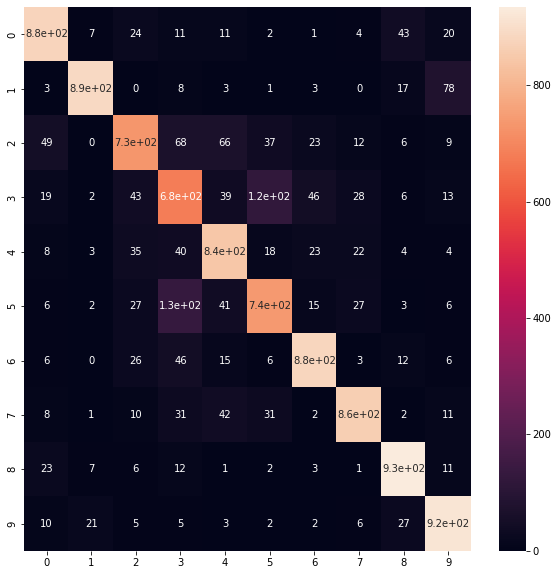

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True)

# Image Classification on Fashion MNIST

###Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. 

###Each example is a 28x28 grayscale image, associated with a label from 10 classes.

## Data Loading

In [54]:
from keras.datasets import fashion_mnist

In [55]:
(xtrain_fm,ytrain_fm),(xtest_fm,ytest_fm)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Data Preprocessing

In [56]:
input_shape=(28,28,1)

xtrain_fm=xtrain_fm/255
xtrain_fm=xtrain_fm.astype(np.float)

xtest_fm=xtest_fm/255
xtest_fm=xtest_fm.astype(np.float)



<ipython-input-56-edb9b72b55bd>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xtrain_fm=xtrain_fm.astype(np.float)
<ipython-input-56-edb9b72b55bd>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xtest_fm=xtest_fm.astype(np.float)


In [57]:
xtrain_fm=xtrain_fm.reshape(60000,28,28,1)
xtest_fm=xtest_fm.reshape(10000,28,28,1)

In [58]:
ytrain_fm = keras.utils.to_categorical(ytrain_fm,10)
ytest_fm = keras.utils.to_categorical(ytest_fm,10)

## Model Training


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

## Model 1

In [60]:
model_FM = Sequential()

model_FM.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model_FM.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM.add(MaxPooling2D(pool_size=(2,2)))

model_FM.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model_FM.add(MaxPooling2D(pool_size=(2,2)))



model_FM.add(Flatten())
model_FM.add(Dense(units=1024,activation='relu'))
model_FM.add(Dense(units=128,activation='relu'))

model_FM.add(Dense(units=10,activation='softmax'))

In [61]:
model_FM.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc']) 
model_FM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [62]:
h=model_FM.fit(xtrain_fm,ytrain_fm,validation_data=(xtest_fm,ytest_fm),epochs=50,verbose=1,batch_size=batchsize,shuffle=True)

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4320 - acc: 0.8382 - val_loss: 0.3315 - val_acc: 0.8802
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2689 - acc: 0.9005 - val_loss: 0.2694 - val_acc: 0.9026
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2215 - acc: 0.9184 - val_loss: 0.2815 - val_acc: 0.9015
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1891 - acc: 0.9301 - val_loss: 0.2474 - val_acc: 0.9102
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1629 - acc: 0.9385 - val_loss: 0.2435 - val_acc: 0.9192
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1374 - acc: 0.9491 - val_loss: 0.2252 - val_acc: 0.9219
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1166 - acc: 0.9568 - val_loss: 0.2639 - val_acc: 0.9186
Epoch 8/50
1875/1875 [==============================] - 9s 

In [63]:
best=max(h.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 92.49


In [64]:
score_FM = model_FM.evaluate(xtest_fm,ytest_fm)
model_FM.save('FM_model1.h5')

313/313 [==============================] - 1s 4ms/step - loss: 0.7163 - acc: 0.9198


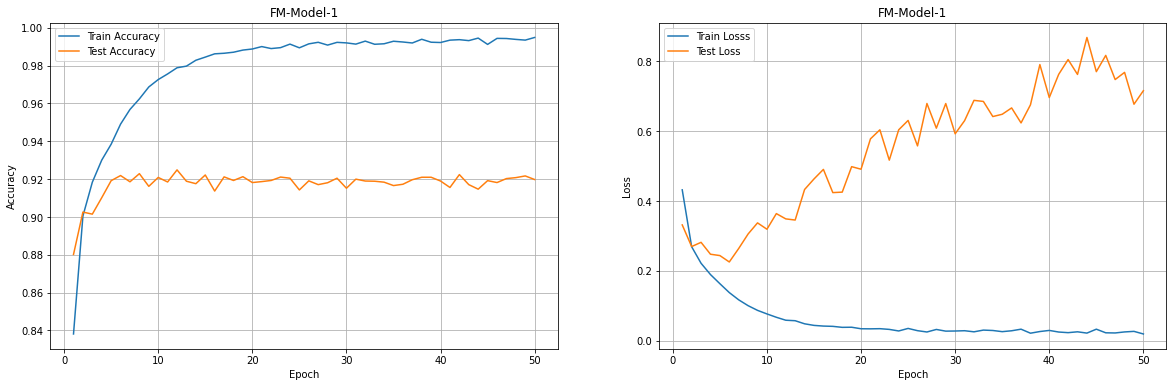

In [65]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,h.history['acc'],label='Train Accuracy')
plt.plot(epochs,h.history['val_acc'],label='Test Accuracy')
plt.title('FM-Model-1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Accuracy_model_1.png')


plt.subplot(1,2,2)
plt.plot(epochs,h.history['loss'],label='Train Losss')
plt.plot(epochs,h.history['val_loss'],label='Test Loss')
plt.title('FM-Model-1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Loss_model_1.png')
plt.show()

## Model 2 

In [66]:
model_FM1 = Sequential()

model_FM1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model_FM1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM1.add(MaxPooling2D(pool_size=(2,2)))


model_FM1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM1.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model_FM1.add(MaxPooling2D(pool_size=(2,2)))


model_FM1.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model_FM1.add(MaxPooling2D(pool_size=(2,2)))



model_FM1.add(Flatten())
model_FM1.add(Dense(units=1024,activation='relu'))
model_FM1.add(Dense(units=128,activation='relu'))

model_FM1.add(Dense(units=10,activation='softmax'))

In [67]:
model_FM1.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc']) 
model_FM1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                 

In [68]:
h1=model_FM1.fit(xtrain_fm,ytrain_fm,validation_data=(xtest_fm,ytest_fm),epochs=50,verbose=1,batch_size=batchsize,shuffle=True)

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5129 - acc: 0.8080 - val_loss: 0.3463 - val_acc: 0.8732
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2958 - acc: 0.8917 - val_loss: 0.2937 - val_acc: 0.8946
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2515 - acc: 0.9075 - val_loss: 0.2695 - val_acc: 0.9033
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2185 - acc: 0.9193 - val_loss: 0.2570 - val_acc: 0.9088
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1968 - acc: 0.9289 - val_loss: 0.2445 - val_acc: 0.9121
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1725 - acc: 0.9371 - val_loss: 0.2562 - val_acc: 0.9136
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1525 - acc: 0.9435 - val_loss: 0.2637 - val_acc: 0.9176
Epoch 8/50
1875/1875 [==============================] -

In [69]:
best=max(h1.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 92.23


In [70]:
score_FM1 = model_FM1.evaluate(xtest_fm,ytest_fm)
model_FM1.save('FM_model2.h5')

313/313 [==============================] - 1s 4ms/step - loss: 0.5771 - acc: 0.9119


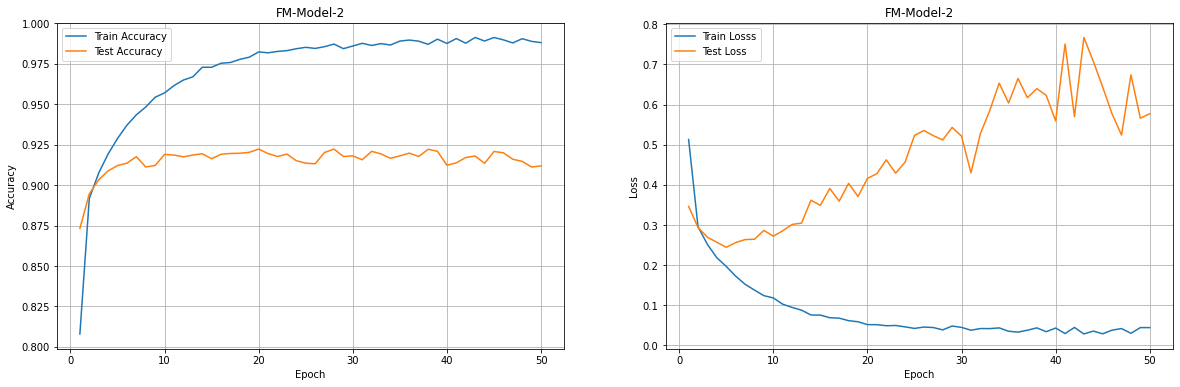

In [71]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,h1.history['acc'],label='Train Accuracy')
plt.plot(epochs,h1.history['val_acc'],label='Test Accuracy')
plt.title('FM-Model-2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Accuracy_model_2.png')


plt.subplot(1,2,2)
plt.plot(epochs,h1.history['loss'],label='Train Losss')
plt.plot(epochs,h1.history['val_loss'],label='Test Loss')
plt.title('FM-Model-2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Loss_model_2.png')
plt.show()

## Model 3 using Dropout

In [72]:
model_FM2 = Sequential()

model_FM2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model_FM2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM2.add(MaxPooling2D(pool_size=(2,2)))
model_FM2.add(Dropout(0.25))

model_FM2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM2.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model_FM2.add(MaxPooling2D(pool_size=(2,2)))
model_FM2.add(Dropout(0.25))

model_FM2.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model_FM2.add(MaxPooling2D(pool_size=(2,2)))
model_FM2.add(Dropout(0.25))


model_FM2.add(Flatten())
model_FM2.add(Dense(units=1024,activation='relu'))
model_FM2.add(Dense(units=128,activation='relu'))

model_FM2.add(Dense(units=10,activation='softmax'))

In [73]:
model_FM2.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc']) 
model_FM2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_42 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 128)         73856     
                                                      

In [74]:
h2=model_FM2.fit(xtrain_fm,ytrain_fm,validation_data=(xtest_fm,ytest_fm),epochs=50,verbose=1,batch_size=batchsize,shuffle=True)

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5637 - acc: 0.7866 - val_loss: 0.3523 - val_acc: 0.8737
Epoch 2/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3469 - acc: 0.8740 - val_loss: 0.3554 - val_acc: 0.8631
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2998 - acc: 0.8912 - val_loss: 0.2782 - val_acc: 0.8974
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2770 - acc: 0.8993 - val_loss: 0.2599 - val_acc: 0.9059
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2579 - acc: 0.9070 - val_loss: 0.2578 - val_acc: 0.9069
Epoch 6/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2434 - acc: 0.9116 - val_loss: 0.2528 - val_acc: 0.9083
Epoch 7/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2367 - acc: 0.9144 - val_loss: 0.2372 - val_acc: 0.9138
Epoch 8/50
1875/1875 [==============================] -

In [75]:
best=max(h2.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 92.8


In [76]:
score_FM2 = model_FM2.evaluate(xtest_fm,ytest_fm)
model_FM2.save('FM_model3.h5')

313/313 [==============================] - 1s 4ms/step - loss: 0.2460 - acc: 0.9263


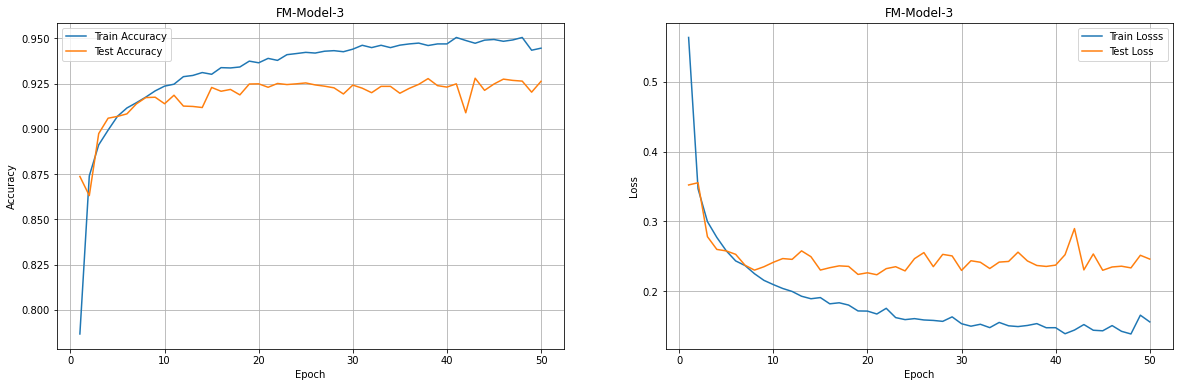

In [77]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,h2.history['acc'],label='Train Accuracy')
plt.plot(epochs,h2.history['val_acc'],label='Test Accuracy')
plt.title('FM-Model-3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Accuracy_model_3.png')


plt.subplot(1,2,2)
plt.plot(epochs,h2.history['loss'],label='Train Losss')
plt.plot(epochs,h2.history['val_loss'],label='Test Loss')
plt.title('FM-Model-3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Loss_model_3.png')
plt.show()

## Model 4 using Batch Normalization


In [78]:
model_FM3 = Sequential()

model_FM3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model_FM3.add(BatchNormalization())
model_FM3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM3.add(BatchNormalization())
model_FM3.add(MaxPooling2D(pool_size=(2,2)))
model_FM3.add(Dropout(0.25))

model_FM3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model_FM3.add(BatchNormalization())
model_FM3.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model_FM3.add(BatchNormalization())
model_FM3.add(MaxPooling2D(pool_size=(2,2)))
model_FM3.add(Dropout(0.25))

model_FM3.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model_FM3.add(BatchNormalization())
model_FM3.add(MaxPooling2D(pool_size=(2,2)))
model_FM3.add(Dropout(0.25))


model_FM3.add(Flatten())
model_FM3.add(Dense(units=1024,activation='relu'))
model_FM3.add(Dense(units=128,activation='relu'))

model_FM3.add(Dense(units=10,activation='softmax'))

In [79]:
model_FM3.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc']) 
model_FM3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_16 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_47 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                      

In [80]:
h3=model_FM3.fit(xtrain_fm,ytrain_fm,validation_data=(xtest_fm,ytest_fm),epochs=50,verbose=1,batch_size=batchsize,shuffle=True)

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4661 - acc: 0.8284 - val_loss: 0.3323 - val_acc: 0.8812
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3155 - acc: 0.8860 - val_loss: 0.3413 - val_acc: 0.8780
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2791 - acc: 0.8978 - val_loss: 0.2925 - val_acc: 0.8991
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2532 - acc: 0.9076 - val_loss: 0.2756 - val_acc: 0.9034
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2346 - acc: 0.9141 - val_loss: 0.2317 - val_acc: 0.9160
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2173 - acc: 0.9227 - val_loss: 0.2436 - val_acc: 0.9111
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2053 - acc: 0.9254 - val_loss: 0.2370 - val_acc: 0.9198
Epoch 8/50
1875/1875 [==============================] -

In [81]:
best=max(h3.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 93.91


In [82]:
score_FM3 = model_FM3.evaluate(xtest_fm,ytest_fm)
model_FM3.save('FM_model3.h5')

313/313 [==============================] - 1s 4ms/step - loss: 0.2676 - acc: 0.9364


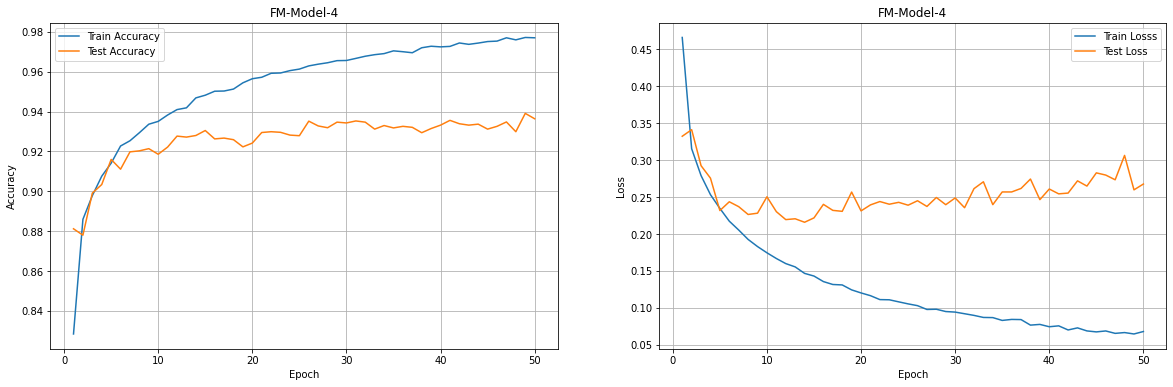

In [83]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,h3.history['acc'],label='Train Accuracy')
plt.plot(epochs,h3.history['val_acc'],label='Test Accuracy')
plt.title('FM-Model-4')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Accuracy_model_4.png')


plt.subplot(1,2,2)
plt.plot(epochs,h3.history['loss'],label='Train Losss')
plt.plot(epochs,h3.history['val_loss'],label='Test Loss')
plt.title('FM-Model-4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('FM_Loss_model_4.png')
plt.show()

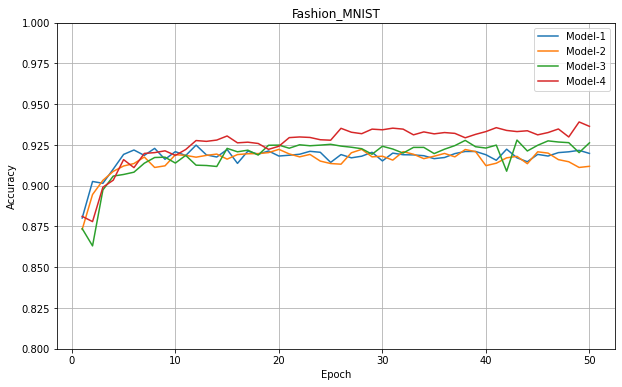

In [84]:
epochs = range(1,51)
plt.figure(figsize=(10,6))


plt.plot(epochs,h.history['val_acc'],label='Model-1')
plt.plot(epochs,h1.history['val_acc'],label='Model-2')
plt.plot(epochs,h2.history['val_acc'],label='Model-3')
plt.plot(epochs,h3.history['val_acc'],label='Model-4')
plt.title('Fashion_MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0.8,1.0])
plt.grid()
plt.legend()
plt.savefig('Comp1.png')

## Prediction

In [85]:
predicted_class =  np.argmax(model_FM3.predict(xtest_fm),axis=1)
predicted_class

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 7])

In [86]:
ytest_fm = ytest_fm.argmax(1)
ytest_fm

array([9, 2, 1, ..., 8, 1, 5])

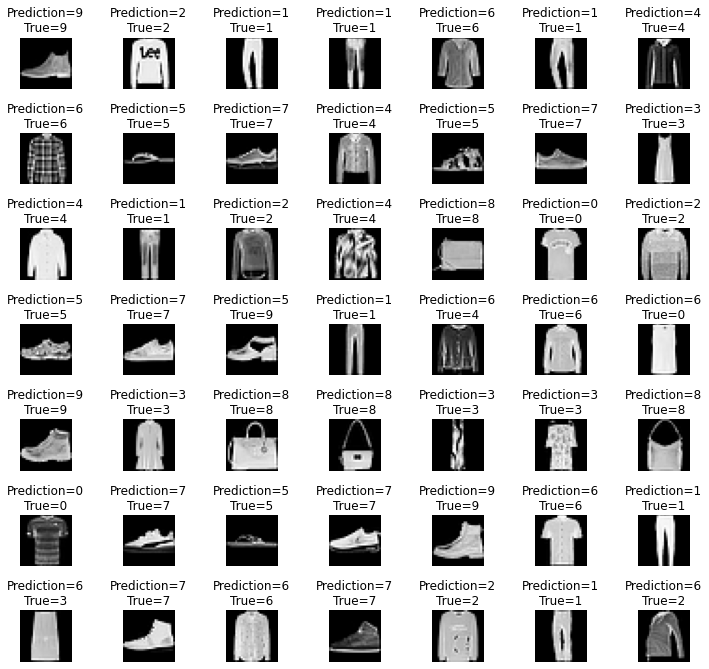

In [87]:
w = 7
l = 7
fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel();

for i in np.arange(0,l*w):
    axes[i].imshow(xtest_fm[i][:,:,0], cmap='gray')
    axes[i].set_title("Prediction={}\nTrue={}".format(predicted_class[i],ytest_fm[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)


In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ytest_fm,predicted_class)
cm

array([[884,   1,  10,  16,   2,   0,  82,   0,   5,   0],
       [  0, 987,   1,  10,   0,   0,   1,   0,   1,   0],
       [ 17,   1, 875,   7,  49,   0,  51,   0,   0,   0],
       [  6,   2,   8, 945,  25,   0,  13,   0,   1,   0],
       [  0,   0,  11,  13, 939,   0,  37,   0,   0,   0],
       [  0,   0,   0,   0,   0, 977,   0,  16,   0,   7],
       [ 74,   0,  31,  27,  55,   0, 810,   0,   3,   0],
       [  0,   0,   0,   0,   0,   1,   0, 985,   0,  14],
       [  1,   0,   0,   3,   2,   2,   3,   1, 988,   0],
       [  0,   0,   0,   0,   0,   4,   1,  21,   0, 974]])

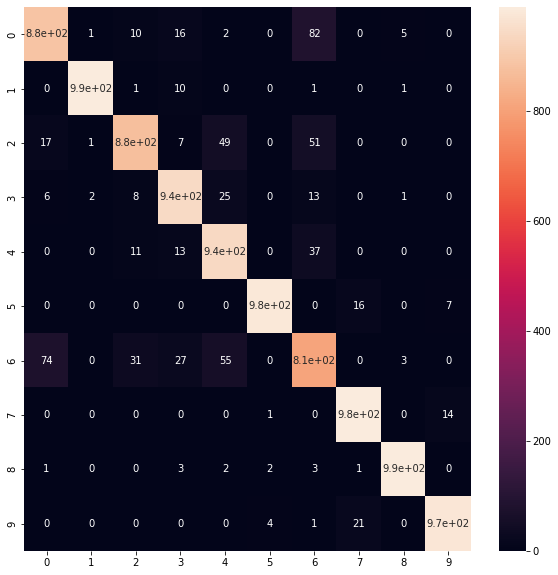

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True)

#Image Classification with MNIST Dataset

###The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

###It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

###There 50000 Training samples and 10000 Testing Samples

In [90]:
# Importing Libaries
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten, BatchNormalization
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k
from keras.models import load_model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

In [91]:
from keras.datasets import mnist

In [92]:
# Load dataset
(xtrain_mn , ytrain_mn) , (xtest_mn , ytest_mn)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Data Preprocessing

In [94]:
xtrain_mn=xtrain_mn.reshape(xtrain_mn.shape[0],28,28,1)
xtest_mn=xtest_mn.reshape(xtest_mn.shape[0],28,28,1)
input_shape=(28,28,1)

In [96]:
ytrain_mn=keras.utils.to_categorical(ytrain_mn, 10)
ytest_mn=keras.utils.to_categorical(ytest_mn,10)

In [97]:
xtrain_mn = xtrain_mn.astype('float32')
xtest_mn = xtest_mn.astype('float32')

xtrain_mn=xtrain_mn/255
xtest_mn=xtest_mn/255

## Model Training

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

## Model 1

In [99]:
model_MN=Sequential()
model_MN.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_MN.add(Conv2D(16,(3,3),activation='relu'))
model_MN.add(MaxPooling2D(pool_size=(2,2)))
model_MN.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_MN.add(Conv2D(64,(3,3),activation='relu'))
model_MN.add(MaxPooling2D(pool_size=(2,2)))

model_MN.add(Flatten())
model_MN.add(Dense(256, activation='relu'))
model_MN.add(Dense(128, activation='relu'))
model_MN.add(Dense(10, activation='softmax'))


In [100]:
model_MN.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])
model_MN.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_52 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 conv2d_54 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [101]:
# Model training
history=model_MN.fit(xtrain_mn,ytrain_mn , batch_size=32,epochs=50,verbose=1,validation_data=(xtest_mn,ytest_mn))


Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1353 - acc: 0.9582 - val_loss: 0.0484 - val_acc: 0.9849
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - acc: 0.9864 - val_loss: 0.0363 - val_acc: 0.9882
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0322 - acc: 0.9903 - val_loss: 0.0336 - val_acc: 0.9889
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0261 - acc: 0.9918 - val_loss: 0.0382 - val_acc: 0.9874
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - acc: 0.9940 - val_loss: 0.0297 - val_acc: 0.9910
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0438 - val_acc: 0.9880
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0141 - acc: 0.9956 - val_loss: 0.0305 - val_acc: 0.9924
Epoch 8/50
1875/1875 [==============================] - 9s 5ms

In [102]:
best=max(history.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 99.37


In [103]:
score_MN=model_MN.evaluate(xtest_mn,ytest_mn)
model_MN.save('MN_model1.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.0812 - acc: 0.9922


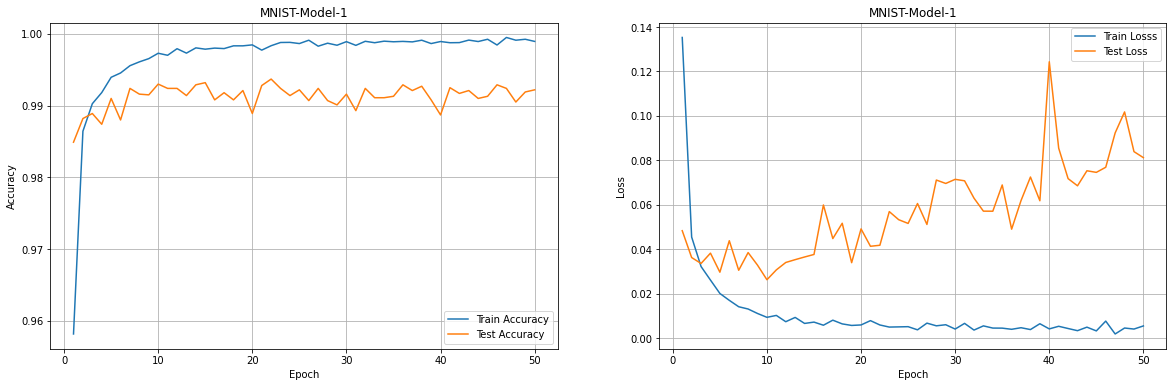

In [104]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,history.history['acc'],label='Train Accuracy')
plt.plot(epochs,history.history['val_acc'],label='Test Accuracy')
plt.title('MNIST-Model-1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Accuracy_model_1.png')


plt.subplot(1,2,2)
plt.plot(epochs,history.history['loss'],label='Train Losss')
plt.plot(epochs,history.history['val_loss'],label='Test Loss')
plt.title('MNIST-Model-1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Loss_model_1.png')
plt.show()

## Model 2

In [105]:
# Prediction 

In [106]:
model_MN1=Sequential()
model_MN1.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_MN1.add(Conv2D(16,(3,3),activation='relu'))
model_MN1.add(MaxPooling2D(pool_size=(2,2)))
model_MN1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_MN1.add(Conv2D(64,(3,3),activation='relu'))
model_MN1.add(MaxPooling2D(pool_size=(2,2)))
model_MN1.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_MN1.add(MaxPooling2D(pool_size=(2,2)))

model_MN1.add(Flatten())
model_MN1.add(Dense(256, activation='relu'))
model_MN1.add(Dense(128, activation='relu'))

model_MN1.add(Dense(10, activation='softmax'))

In [107]:
model_MN1.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc']) 
model_MN1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_56 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 conv2d_58 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                

In [108]:
# Model training
history1=model_MN1.fit(xtrain_mn,ytrain_mn , batch_size=32,epochs=50,verbose=1,validation_data=(xtest_mn,ytest_mn))


Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1644 - acc: 0.9475 - val_loss: 0.0643 - val_acc: 0.9810
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0501 - acc: 0.9850 - val_loss: 0.0441 - val_acc: 0.9864
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0379 - acc: 0.9886 - val_loss: 0.0265 - val_acc: 0.9922
Epoch 4/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0290 - acc: 0.9914 - val_loss: 0.0334 - val_acc: 0.9904
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0250 - acc: 0.9929 - val_loss: 0.0303 - val_acc: 0.9911
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0213 - acc: 0.9942 - val_loss: 0.0315 - val_acc: 0.9915
Epoch 7/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0176 - acc: 0.9947 - val_loss: 0.0453 - val_acc: 0.9868
Epoch 8/50
1875/1875 [==============================] - 8s 5ms

In [109]:
best=max(history1.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 99.38


In [110]:
score_MN1=model_MN1.evaluate(xtest_mn,ytest_mn)
model_MN1.save('MN_model2.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.0866 - acc: 0.9907


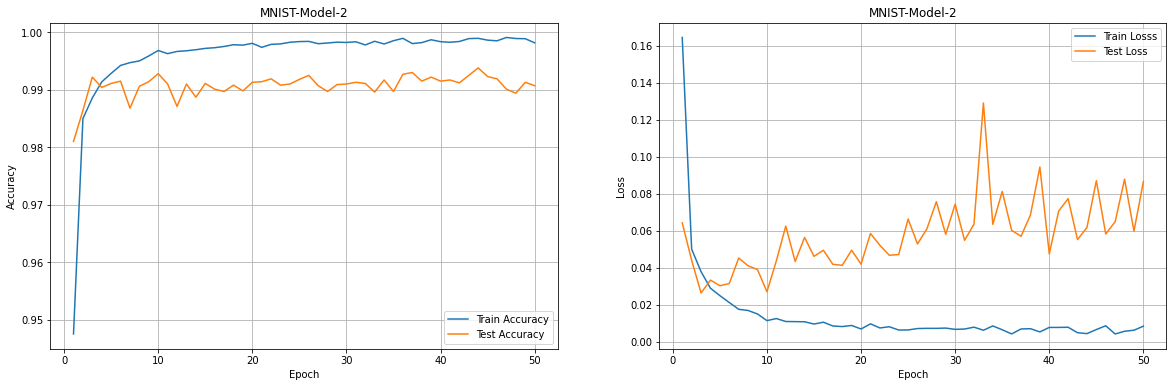

In [111]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,history1.history['acc'],label='Train Accuracy')
plt.plot(epochs,history1.history['val_acc'],label='Test Accuracy')
plt.title('MNIST-Model-2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Accuracy_model_2.png')


plt.subplot(1,2,2)
plt.plot(epochs,history1.history['loss'],label='Train Losss')
plt.plot(epochs,history1.history['val_loss'],label='Test Loss')
plt.title('MNIST-Model-2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Loss_model_2.png')
plt.show()

## Model 3 using Dropout

In [112]:
model_MN2=Sequential()
model_MN2.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_MN2.add(Conv2D(16,(3,3),activation='relu'))
model_MN2.add(MaxPooling2D(pool_size=(2,2)))
model_MN2.add(Dropout(0.25))
model_MN2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_MN2.add(Conv2D(64,(3,3),activation='relu'))
model_MN2.add(MaxPooling2D(pool_size=(2,2)))
model_MN2.add(Dropout(0.25))
model_MN2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_MN2.add(MaxPooling2D(pool_size=(2,2)))
model_MN2.add(Dropout(0.25))

model_MN2.add(Flatten())
model_MN2.add(Dense(256, activation='relu'))
model_MN2.add(Dense(128, activation='relu'))

model_MN2.add(Dense(10, activation='softmax'))

In [113]:
model_MN2.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc']) 
model_MN2.summary();

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_61 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 12, 12, 16)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 conv2d_63 (Conv2D)          (None, 8, 8, 64)          18496     
                                                     

In [114]:
# Model training
history2=model_MN2.fit(xtrain_mn,ytrain_mn , batch_size=32,epochs=50,verbose=1,validation_data=(xtest_mn,ytest_mn))


Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2636 - acc: 0.9150 - val_loss: 0.0481 - val_acc: 0.9857
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0836 - acc: 0.9750 - val_loss: 0.0389 - val_acc: 0.9875
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0634 - acc: 0.9820 - val_loss: 0.0419 - val_acc: 0.9861
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0572 - acc: 0.9829 - val_loss: 0.0281 - val_acc: 0.9922
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0504 - acc: 0.9855 - val_loss: 0.0297 - val_acc: 0.9916
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - acc: 0.9870 - val_loss: 0.0266 - val_acc: 0.9925
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0410 - acc: 0.9876 - val_loss: 0.0249 - val_acc: 0.9925
Epoch 8/50
1875/1875 [==============================] - 9s 5m

In [115]:
best=max(history2.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 99.51


In [116]:
score_MN2=model_MN2.evaluate(xtest_mn,ytest_mn)
model_MN2.save('MN_model3.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.0244 - acc: 0.9939


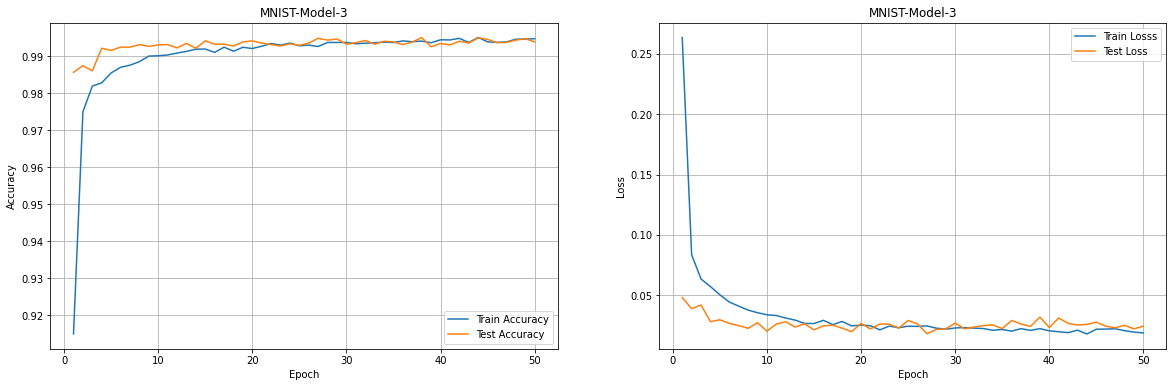

In [117]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,history2.history['acc'],label='Train Accuracy')
plt.plot(epochs,history2.history['val_acc'],label='Test Accuracy')
plt.title('MNIST-Model-3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Accuracy_model_3.png')


plt.subplot(1,2,2)
plt.plot(epochs,history2.history['loss'],label='Train Losss')
plt.plot(epochs,history2.history['val_loss'],label='Test Loss')
plt.title('MNIST-Model-3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Loss_model_3.png')
plt.show()

## Model 4 using Batch Normalization

In [118]:
model_MN3=Sequential()
model_MN3.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_MN3.add(BatchNormalization())
model_MN3.add(Conv2D(16,(3,3),activation='relu'))
model_MN3.add(BatchNormalization())
model_MN3.add(MaxPooling2D(pool_size=(2,2)))
model_MN3.add(Dropout(0.25))
model_MN3.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_MN3.add(BatchNormalization())
model_MN3.add(Conv2D(64,(3,3),activation='relu'))
model_MN3.add(BatchNormalization())
model_MN3.add(MaxPooling2D(pool_size=(2,2)))
model_MN3.add(Dropout(0.25))
model_MN3.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_MN3.add(BatchNormalization())
model_MN3.add(MaxPooling2D(pool_size=(2,2)))
model_MN3.add(Dropout(0.25))

model_MN3.add(Flatten())
model_MN3.add(Dense(256, activation='relu'))
model_MN3.add(Dense(128, activation='relu'))

model_MN3.add(Dense(10, activation='softmax'))

In [119]:
model_MN3.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc']) 
model_MN3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 batch_normalization_21 (Bat  (None, 26, 26, 8)        32        
 chNormalization)                                                
                                                                 
 conv2d_66 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 batch_normalization_22 (Bat  (None, 24, 24, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                     

In [120]:
# Model training
history3=model_MN3.fit(xtrain_mn,ytrain_mn , batch_size=32,epochs=50,verbose=1,validation_data=(xtest_mn,ytest_mn))


Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1870 - acc: 0.9400 - val_loss: 0.0581 - val_acc: 0.9827
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0729 - acc: 0.9783 - val_loss: 0.0381 - val_acc: 0.9888
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0580 - acc: 0.9831 - val_loss: 0.0457 - val_acc: 0.9867
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0508 - acc: 0.9841 - val_loss: 0.0295 - val_acc: 0.9917
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0301 - val_acc: 0.9915
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0403 - acc: 0.9880 - val_loss: 0.0279 - val_acc: 0.9925
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0369 - acc: 0.9893 - val_loss: 0.0239 - val_acc: 0.9929
Epoch 8/50
1875/1875 [==============================] -

In [121]:
best=max(history3.history['val_acc']) *100
print('Best Accuracy = '+str(round(best,2)))

Best Accuracy = 99.54


In [122]:
score_MN3=model_MN3.evaluate(xtest_mn,ytest_mn)
model_MN3.save('MN_model4.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.0296 - acc: 0.9946


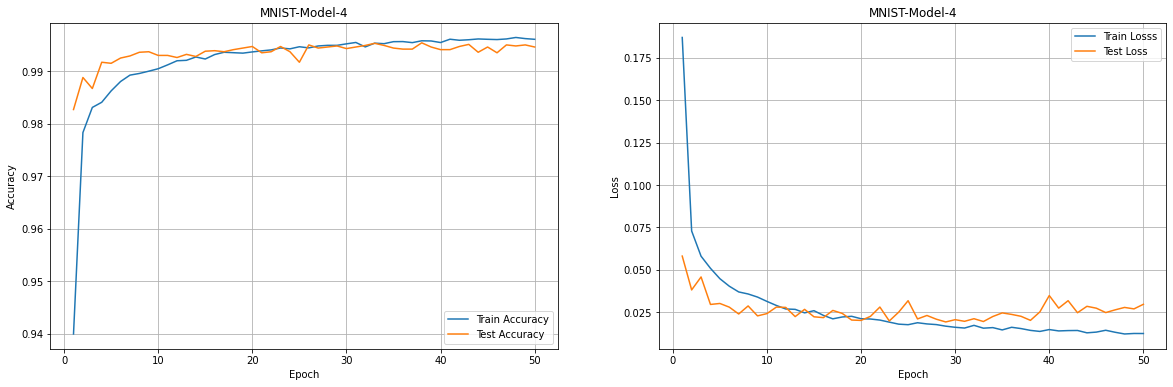

In [123]:
epochs = range(1,51)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epochs,history3.history['acc'],label='Train Accuracy')
plt.plot(epochs,history3.history['val_acc'],label='Test Accuracy')
plt.title('MNIST-Model-4')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Accuracy_model_4.png')


plt.subplot(1,2,2)
plt.plot(epochs,history3.history['loss'],label='Train Losss')
plt.plot(epochs,history3.history['val_loss'],label='Test Loss')
plt.title('MNIST-Model-4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.savefig('MN_Loss_model_4.png')
plt.show()

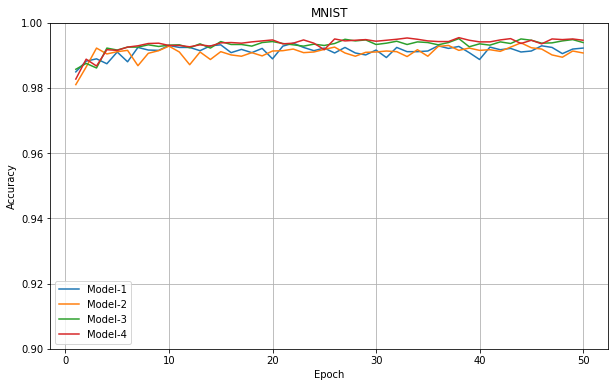

In [124]:
epochs = range(1,51)
plt.figure(figsize=(10,6))


plt.plot(epochs,history.history['val_acc'],label='Model-1')
plt.plot(epochs,history1.history['val_acc'],label='Model-2')
plt.plot(epochs,history2.history['val_acc'],label='Model-3')
plt.plot(epochs,history3.history['val_acc'],label='Model-4')
plt.title('MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0.9,1.0])
plt.grid()
plt.legend()
plt.savefig('Comp2.png')

##Prediction

In [125]:
predicted_class =  np.argmax(model_MN.predict(xtest_mn),axis=1)
predicted_class

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [109]:
ytest_mn = ytest_mn.argmax(1)
ytest_mn

array([7, 2, 1, ..., 4, 5, 6])

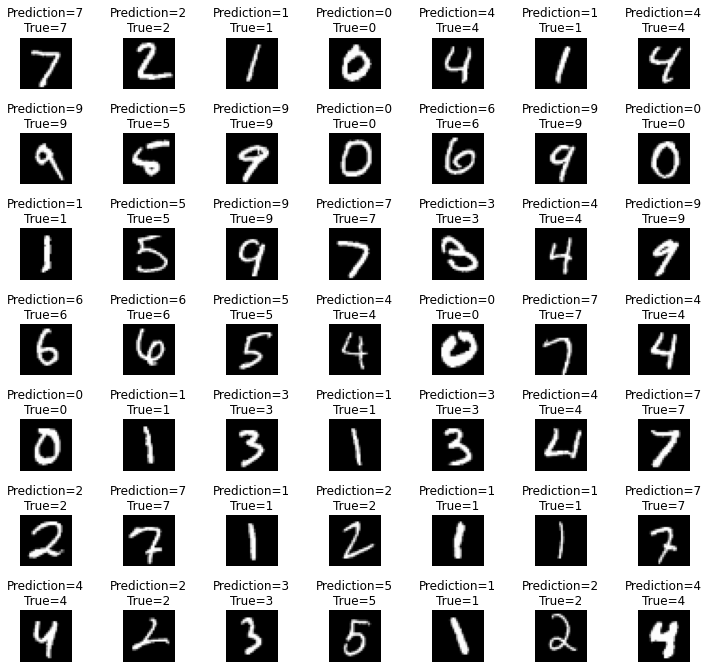

In [111]:
w = 7
l = 7
fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel();

for i in np.arange(0,l*w):
    axes[i].imshow(xtest_mn[i][:,:,0], cmap='gray')
    axes[i].set_title("Prediction={}\nTrue={}".format(predicted_class[i],ytest_mn[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ytest_mn,predicted_class)
cm

array([[ 977,    1,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    1, 1026,    1,    1,    0,    0,    3,    0,    0],
       [   0,    1,    2, 1002,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  973,    0,    0,    0,    2,    7],
       [   1,    1,    0,    3,    0,  886,    1,    0,    0,    0],
       [   5,    3,    3,    0,    0,    5,  940,    0,    2,    0],
       [   0,    3,    0,    0,    1,    0,    0, 1023,    0,    1],
       [   1,    0,    1,    0,    0,    0,    0,    1,  968,    3],
       [   0,    0,    1,    1,    5,    3,    0,    3,    1,  995]])

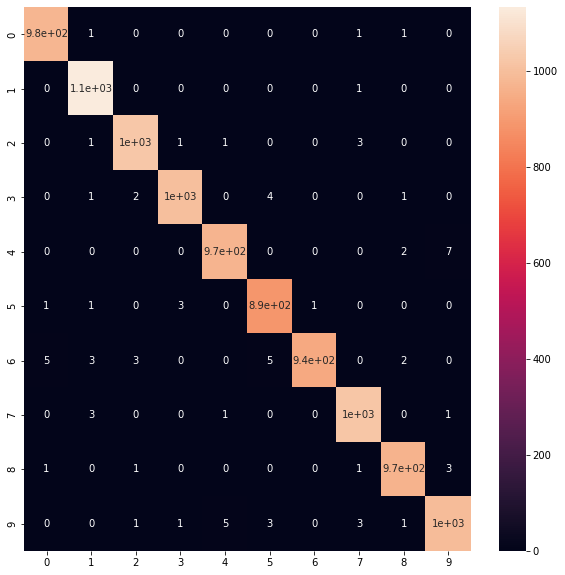

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True)

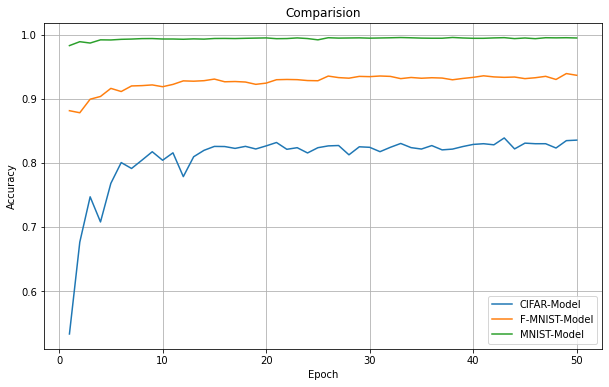

In [128]:
# Comparision between models performance on datasets
epochs = range(1,51)
plt.figure(figsize=(10,6))


plt.plot(epochs,hist3.history['val_accuracy'],label='CIFAR-Model')
plt.plot(epochs,h3.history['val_acc'],label='F-MNIST-Model')
plt.plot(epochs,history3.history['val_acc'],label='MNIST-Model')
plt.title('Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.grid()
plt.legend()
plt.savefig('Comp3.png')